In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
import matplotlib

%matplotlib inline


In [154]:
def plot_log_log_VL_V0(frequencies, V0, VL):

    omega = 2 * np.pi * np.array(frequencies)
    
    VL_V0 = np.array(VL) / np.array(V0)
    
    plt.figure(figsize=(8, 6))
    plt.loglog(omega,VL_V0, 'o-', label='Data')
    plt.xlabel('Angular Frequency (rad/s)')
    plt.ylabel('V_L / V_0')
    plt.title('V_L / V_0 vs Angular Frequency (Log-Log Scale)')
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()
def plot_log_log_VL_V0_2(frequencies, V0, VL):
    """
    Plots VL/V0 as a function of angular frequency using a log-log scale.
    
    Parameters:
    - frequencies: List or array of frequencies (in Hz)
    - V0: List or array of V0 values (in Volts)
    - VL: List or array of VL values (in Volts)
    """
    omega = 2 * np.pi * np.array(frequencies)
    
    VL_V0 = np.array(VL) / np.array(V0)
    
    plt.figure(figsize=(8, 6))
    plt.loglog(omega, VL_V0, 'o-', label='Data')
    plt.xlabel('Angular Frequency (rad/s)')
    plt.ylabel('V_L / V_0')
    plt.title('V_L / V_0 vs Angular Frequency (Log-Log Scale)')
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()

In [171]:
def fit_function(omega, A, tau):
    return (A * omega * tau) / np.sqrt(1 + (omega ** 2) * (tau ** 2))

def fit_function_1(omega, A, tau):
    return A / np.sqrt(1 + (omega ** 2) * (tau ** 2))  

def analyze_frequency_data_1(frequencies, V0, VL):
    omega = 2 * np.pi * np.array(frequencies)
    VL_V0 = np.array(VL) / np.array(V0)

    valid_indices = (omega > 0) & (VL_V0 > 0)
    omega = omega[valid_indices]
    VL_V0 = VL_V0[valid_indices]

    initial_guesses = [1, 1e-4]
    bounds = (0, [10, 1e2])  
    
    popt, pcov = curve_fit(fit_function_1, omega, VL_V0, p0=initial_guesses, bounds=bounds)
    A, tau = popt
    A_err, tau_err = np.sqrt(np.diag(pcov))
    
    omega_fit = np.logspace(np.log10(min(omega)), np.log10(max(omega)), 100)
    VL_V0_fit = fit_function_1(omega_fit, A, tau) 
    
    plt.figure(figsize=(8, 6))
    plt.loglog(omega, VL_V0, 'o', label='Data')
    plt.loglog(omega_fit, VL_V0_fit, '-', label=f'Fit: A={A:.3f} ± {A_err:.3f}, τ={tau:.3e} ± {tau_err:.3e}')
    plt.xlabel('Angular Frequency (rad/s)')
    plt.ylabel('V_L / V_0')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.title('V_L / V_0 vs Angular Frequency')
    plt.show()
    
    print(f"A: {A:.3f} ± {A_err:.3f}")
    print(f"τ: {tau:.3e} ± {tau_err:.3e}")

def analyze_frequency_data_2(frequencies, V0, VL):
    omega = 2 * np.pi * np.array(frequencies)
    VL_V0 = np.array(VL) / np.array(V0)

    initial_guesses = [1, 1e-4]
    bounds = (0, [10, 1e2])  
    
    popt, pcov = curve_fit(fit_function, omega, VL_V0, p0=initial_guesses, bounds=bounds)
    A, tau = popt
    A_err, tau_err = np.sqrt(np.diag(pcov))
    
    omega_fit = np.logspace(np.log10(min(omega)), np.log10(max(omega)), 100)
    VL_V0_fit = fit_function(omega_fit, *popt)
    
    plt.figure(figsize=(8, 6))
    plt.loglog(omega, VL_V0, 'o', label='Data')
    plt.loglog(omega_fit, VL_V0_fit, '-', label=f'Fit: A={A:.3f} ± {A_err:.3f}, τ={tau:.3e} ± {tau_err:.3e}')
    plt.xlabel('Angular Frequency (rad/s)')
    plt.ylabel('V_L / V_0')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.title('V_L / V_0 vs Angular Frequency')
    plt.show()
    
    print(f"A: {A:.3f} ± {A_err:.3f}")
    print(f"τ: {tau:.3e} ± {tau_err:.3e}")


In [172]:
part1 = pd.read_csv('part1.csv')
part2 = pd.read_csv('part2.csv')

print(part1.columns)

Index(['Frequency (Hz)', 'V0 (Volts)', 'VC (Volts)', 'Phase shift C (msec)',
       'Phase shift C (degrees)'],
      dtype='object')


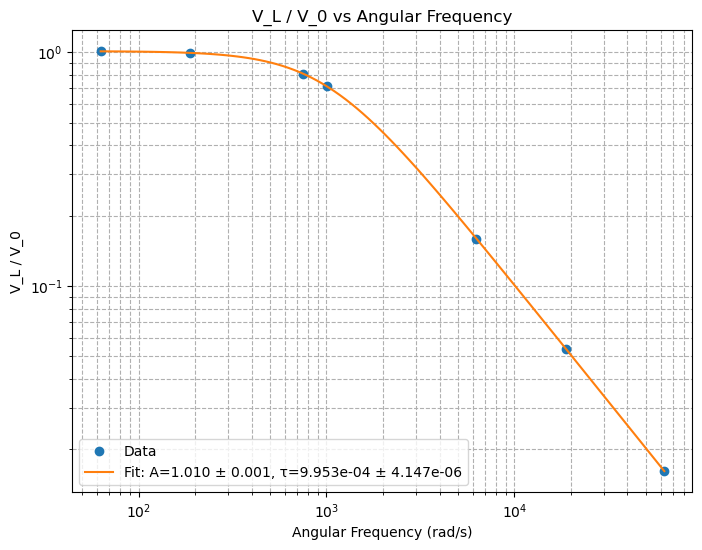

A: 1.010 ± 0.001
τ: 9.953e-04 ± 4.147e-06


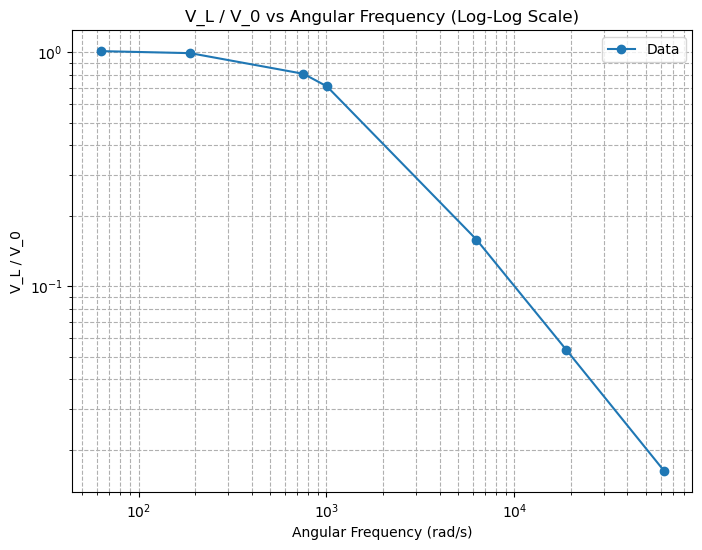

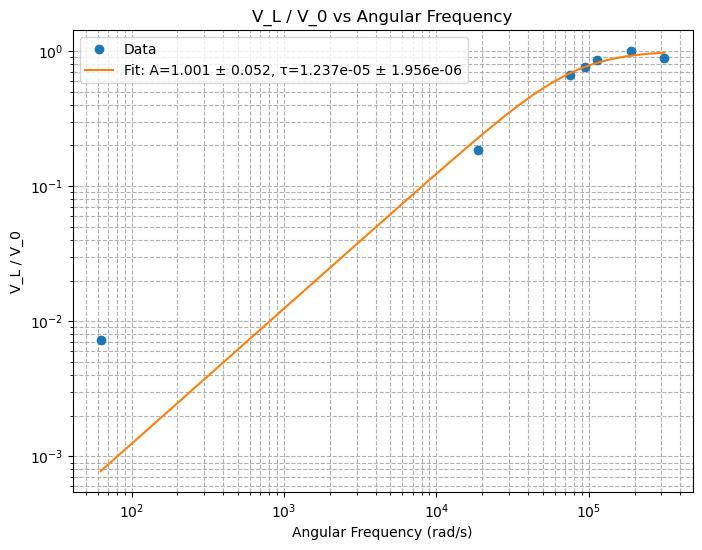

A: 1.001 ± 0.052
τ: 1.237e-05 ± 1.956e-06


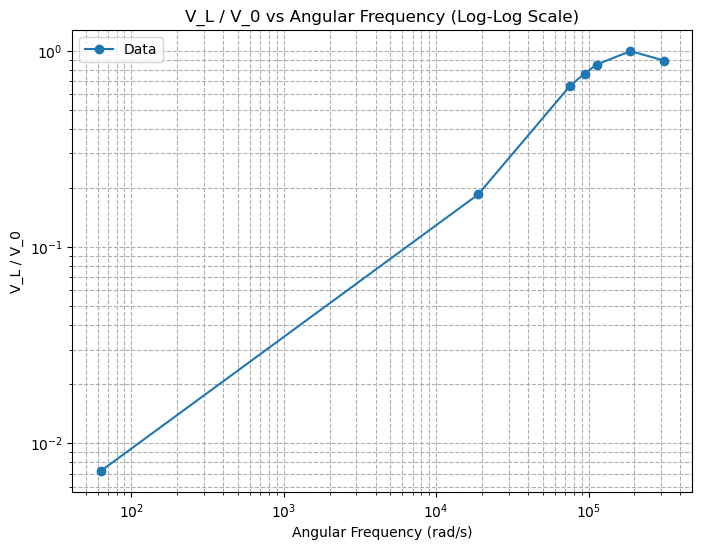

In [173]:
# Dataset 1
frequencies_1 = part1['Frequency (Hz)']
V0_1 = part1['V0 (Volts)']
VL_1 = part1['VC (Volts)']
phase_1 = part1.iloc[0:,4]

analyze_frequency_data_1(frequencies_1, V0_1, VL_1)
plot_log_log_VL_V0(frequencies_1, V0_1, VL_1)

# Dataset 2 
frequencies_2 = part2['Frequency (Hz)']
V0_2 = part2['V0 (Volts)']
VL_2 = part2['VC (Volts)']
phase_2 = part2.iloc[0:,4]

analyze_frequency_data_2(frequencies_2, V0_2, VL_2)
plot_log_log_VL_V0_2(frequencies_2, V0_2, VL_2)


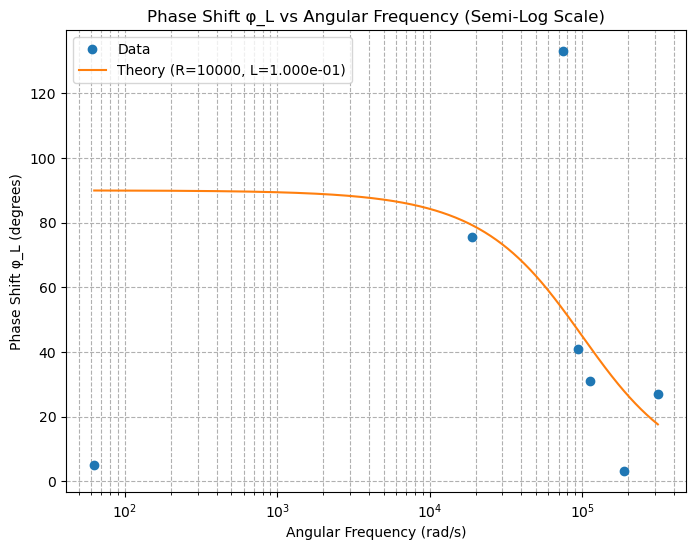

In [ ]:
def phase_shift_function(omega, R, L):

    return np.arctan(R / (omega * L))

def plot_phase_shift(frequencies, phase_shift_data, R, L):
    omega = 2 * np.pi * np.array(frequencies)
    
    phase_shift_rad = np.radians(phase_shift_data)
    
    omega_smooth = np.logspace(np.log10(min(omega)), np.log10(max(omega)), 500)
    
    phase_shift_theory = phase_shift_function(omega_smooth, R, L)
    
    plt.figure(figsize=(8, 6))
    plt.semilogx(omega, np.degrees(phase_shift_rad), 'o', label='Data')
    plt.semilogx(omega_smooth, np.degrees(phase_shift_theory), '-', label=f'Theory (R={R}, L={L:.3e})')
    plt.xlabel('Angular Frequency (rad/s)')
    plt.ylabel('Phase Shift φ_L (degrees)')
    plt.title('Phase Shift φ_L vs Angular Frequency (Semi-Log Scale)')
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()



plot_phase_shift(frequencies_2, phase_2, R = 10000, L= 0.1)

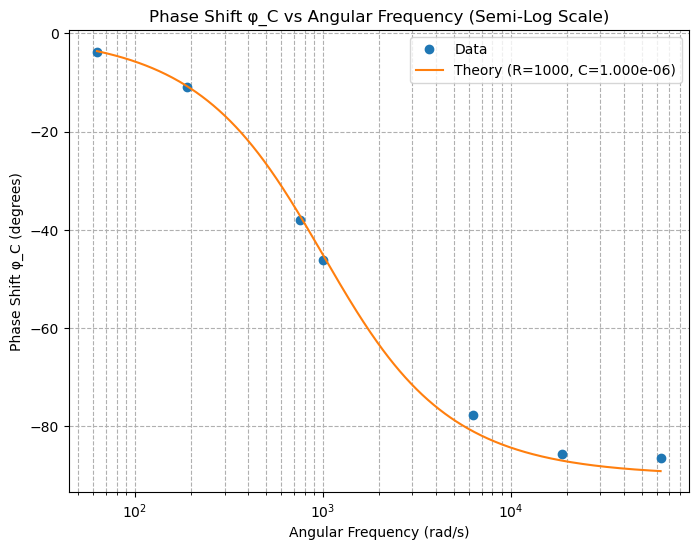

In [105]:
def phase_shift_function_capacitor(omega, R, C):
    return -np.arctan(omega * R * C)

def plot_phase_shift_capacitor(frequencies, phase_shift_data, R, C):

    omega = 2 * np.pi * np.array(frequencies)
    phase_shift_rad = np.radians(phase_shift_data)
    
    omega_smooth = np.logspace(np.log10(min(omega)), np.log10(max(omega)), 500)
    
    phase_shift_theory = phase_shift_function_capacitor(omega_smooth, R, C)
    omega = -2 * np.pi * np.array(frequencies)
    plt.figure(figsize=(8, 6))
    plt.semilogx(-omega, -np.degrees(phase_shift_rad), 'o', label='Data')
    plt.semilogx(omega_smooth, np.degrees(phase_shift_theory), '-', label=f'Theory (R={R}, C={C:.3e})')
    plt.xlabel('Angular Frequency (rad/s)')
    plt.ylabel('Phase Shift φ_C (degrees)')
    plt.title('Phase Shift φ_C vs Angular Frequency (Semi-Log Scale)')
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()


plot_phase_shift_capacitor(frequencies_1, phase_1, R = 1000, C = .000001)